     Model  BLEU  Response Coherence  Diversity  Latency  TOPSIS Score  Rank
     GPT-4  0.85                0.90       0.81      250      0.701065   1.0
   Mistral  0.79                0.84       0.78      190      0.510113   2.0
BlenderBot  0.78                0.85       0.76      180      0.499294   3.0
   ChatGPT  0.77                0.83       0.74      220      0.280033   4.0
  DialoGPT  0.75                0.80       0.72      200      0.232150   5.0


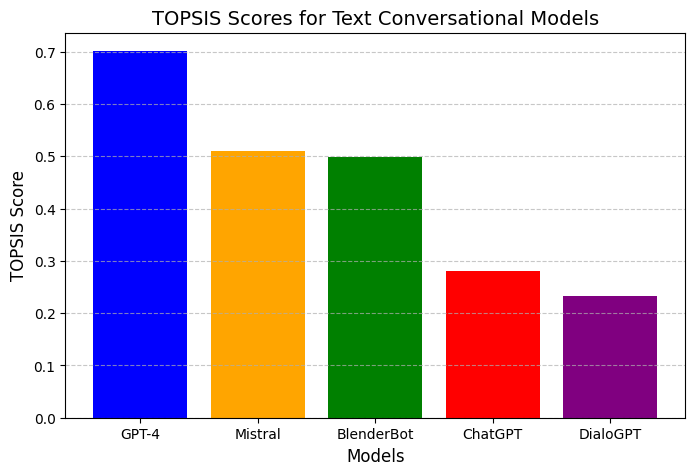

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def topsis(data, weights, cost_criteria):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data.iloc[:, 1:])

    # Handle cost criteria (Latency should be minimized)
    for i in range(len(cost_criteria)):
        if cost_criteria[i]:
            normalized_data[:, i] = 1 - normalized_data[:, i]

    weighted_data = normalized_data * weights
    ideal_best = np.max(weighted_data, axis=0)
    ideal_worst = np.min(weighted_data, axis=0)

    distance_best = np.sqrt(np.sum((weighted_data - ideal_best) ** 2, axis=1))
    distance_worst = np.sqrt(np.sum((weighted_data - ideal_worst) ** 2, axis=1))

    topsis_score = distance_worst / (distance_best + distance_worst)

    data['TOPSIS Score'] = topsis_score
    data['Rank'] = data['TOPSIS Score'].rank(ascending=False)

    return data.sort_values(by='Rank')

# Define dataset for text conversational models
data_conversational = pd.DataFrame({
    "Model": ["DialoGPT", "BlenderBot", "ChatGPT", "GPT-4", "Mistral"],
    "BLEU": [0.75, 0.78, 0.77, 0.85, 0.79],
    "Response Coherence": [0.80, 0.85, 0.83, 0.90, 0.84],
    "Diversity": [0.72, 0.76, 0.74, 0.81, 0.78],
    "Latency": [200, 180, 220, 250, 190]  # Lower is better (cost criterion)
})

weights_conversational = [0.3, 0.3, 0.2, 0.2]  # Ensure they sum to 1
cost_criteria = [False, False, False, True]  # Latency is a cost criterion

results_conversational = topsis(data_conversational, weights_conversational, cost_criteria)

# Display results as a table
print(results_conversational.to_string(index=False))

# Save results to CSV
results_conversational.to_csv('results_conversational.csv', index=False)

# Plot TOPSIS scores
plt.figure(figsize=(8, 5))
plt.bar(results_conversational['Model'], results_conversational['TOPSIS Score'], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('TOPSIS Score', fontsize=12)
plt.title('TOPSIS Scores for Text Conversational Models', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
